# Analysis of model prediction speeds
Corresponds to Section 6a in the manuscript

In [ ]:
# To get Colab working
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/USC Random NN')

Mounted at /content/drive


In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

img_path = './drive/My Drive/Colab Notebooks/USC Random NN/images/'

In [ ]:
experiments_loc = './drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/prediction_speed/'

# Get prediction speed raw results
dense_1M = np.load(f'{experiments_loc}dense_1M_predict_times.npy')
rand_dense_1M = np.load(f'{experiments_loc}rand_dense_1M_predict_times.npy')
cnn_1M = np.load(f'{experiments_loc}cnn_1M_predict_times.npy')
cnn_rand_dense_1M = np.load(f'{experiments_loc}cnn_rand_dense_1M_predict_times.npy')
cnn_lstm_1M = np.load(f'{experiments_loc}cnn_lstm_1M_predict_times.npy')
cnn_lstm_rand_dense_1M = np.load(f'{experiments_loc}cnn_lstm_rand_dense_1M_predict_times.npy')

In [ ]:
vars_to_predict = ['tas', 'diurnal_temperature_range', 'pr', 'pr90']

def print_significant_diffs(standard, rand):
  for i in range(9):
    for j in range(len(vars_to_predict)):
      p_val = stats.ttest_ind(standard[i,j], rand[i,j])[1]
      if p_val < 0.05:
        print(f'{i+2} Layers, {vars_to_predict[j]}')
        if np.mean(standard[i,j]) <= np.mean(rand[i,j]):
          print(f'\tStandard faster')
        else:
          print(f'\tRand faster') 

In [ ]:
print_significant_diffs(dense_1M, rand_dense_1M)

3 Layers, tas
	Rand faster
3 Layers, pr
	Standard faster
3 Layers, pr90
	Standard faster
4 Layers, tas
	Standard faster
4 Layers, pr90
	Rand faster
5 Layers, tas
	Rand faster
5 Layers, diurnal_temperature_range
	Rand faster
5 Layers, pr
	Rand faster


In [ ]:
print_significant_diffs(cnn_1M, cnn_rand_dense_1M)

3 Layers, pr
	Standard faster
5 Layers, tas
	Standard faster
6 Layers, tas
	Rand faster
9 Layers, pr
	Standard faster
9 Layers, pr90
	Standard faster


In [ ]:
print_significant_diffs(cnn_lstm_1M, cnn_lstm_rand_dense_1M)

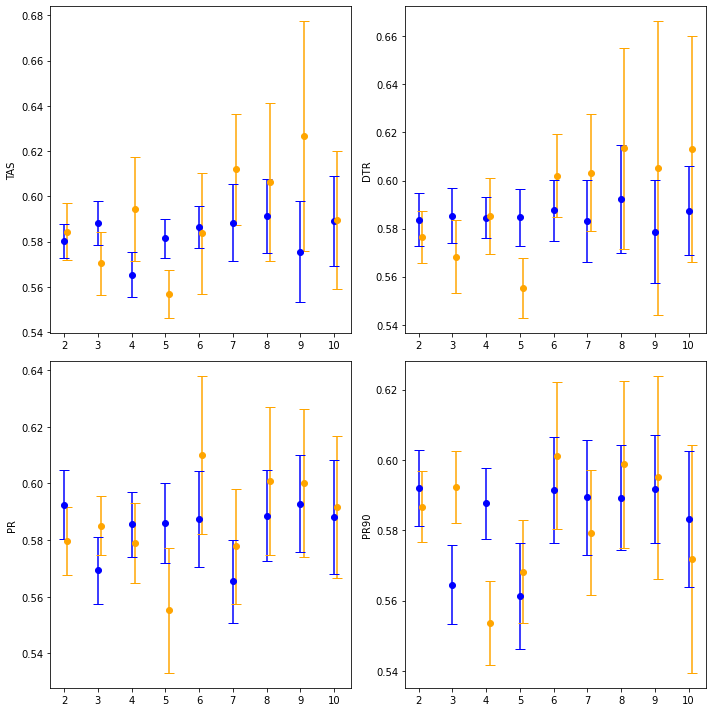

In [ ]:
# Plot MLP vs. RandDense prediction speed for all four variables by hidden layer depth
fig, axes = plt.subplots(2, 2, figsize=(10,10))
var_labels = ['TAS', 'DTR', 'PR', 'PR90']

for var_idx in range(len(vars_to_predict)):
  standard_means = []
  standard_cis = []
  rand_means = []
  rand_cis = []

  for layer_idx in range(9):

    standard_times = dense_1M[layer_idx, var_idx]
    standard_means.append(np.mean(standard_times))
    ci = stats.t.interval(alpha=0.95, df=len(standard_times)-1, loc=np.mean(standard_times), scale=stats.sem(standard_times))
    standard_cis.append((ci[1]-ci[0])/2)

    rand_times = rand_dense_1M[layer_idx, var_idx]
    rand_means.append(np.mean(rand_times))
    ci = stats.t.interval(alpha=0.95, df=len(rand_times)-1, loc=np.mean(rand_times), scale=stats.sem(rand_times))
    rand_cis.append((ci[1]-ci[0])/2)

  ax = axes[var_idx//2, var_idx%2]
  ax.errorbar(x=np.arange(2,11,1), y=standard_means, yerr=standard_cis, color='blue', marker='o', capsize=5, ls='none')
  ax.errorbar(x=np.arange(2.1,11.1,1), y=rand_means, yerr=rand_cis, color='orange', marker='o', capsize=5, ls='none')
  ax.set_ylabel(var_labels[var_idx])

fig.tight_layout()

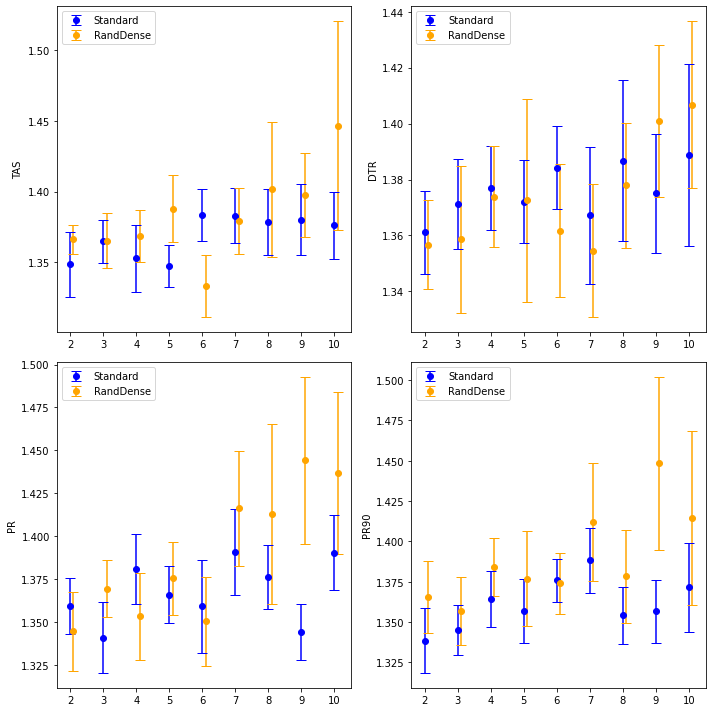

In [ ]:
# Plot CNN vs. CNN RandDense prediction speed for all four variables by hidden layer depth
fig, axes = plt.subplots(2, 2, figsize=(10,10))
var_labels = ['TAS', 'DTR', 'PR', 'PR90']

for var_idx in range(len(vars_to_predict)):
  standard_means = []
  standard_cis = []
  rand_means = []
  rand_cis = []

  for layer_idx in range(9):

    standard_times = cnn_1M[layer_idx, var_idx]
    standard_means.append(np.mean(standard_times))
    ci = stats.t.interval(alpha=0.95, df=len(standard_times)-1, loc=np.mean(standard_times), scale=stats.sem(standard_times))
    standard_cis.append((ci[1]-ci[0])/2)

    rand_times = cnn_rand_dense_1M[layer_idx, var_idx]
    rand_means.append(np.mean(rand_times))
    ci = stats.t.interval(alpha=0.95, df=len(rand_times)-1, loc=np.mean(rand_times), scale=stats.sem(rand_times))
    rand_cis.append((ci[1]-ci[0])/2)

  ax = axes[var_idx//2, var_idx%2]
  ax.errorbar(x=np.arange(2,11,1), y=standard_means, yerr=standard_cis, label='Standard', color='blue', marker='o', capsize=5, ls='none')
  ax.errorbar(x=np.arange(2.1,11.1), y=rand_means, yerr=rand_cis, label='RandDense', color='orange', marker='o', capsize=5, ls='none')
  ax.set_ylabel(var_labels[var_idx])
  ax.legend()

fig.tight_layout()

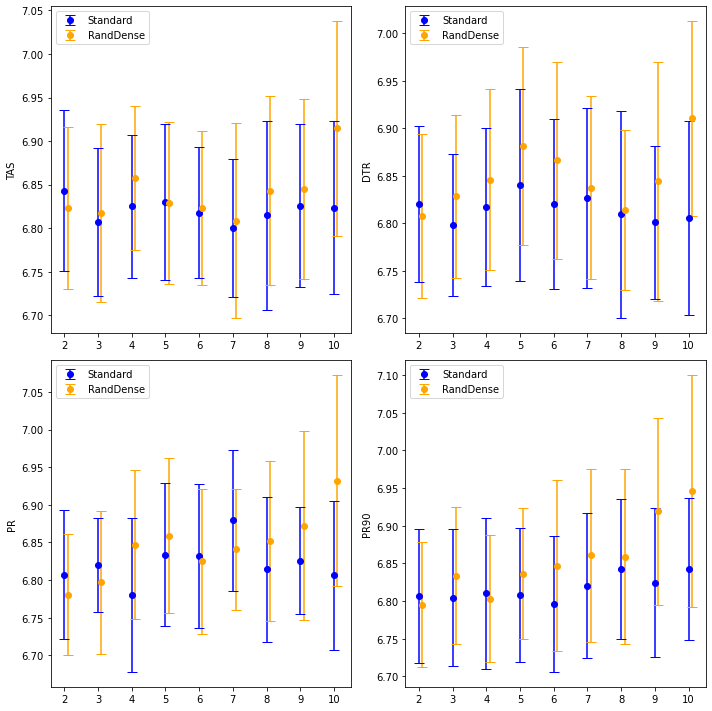

In [ ]:
# Plot CNN-LSTM vs. CNN-LSTM RandDense prediction speed for all four variables by hidden layer depth
fig, axes = plt.subplots(2, 2, figsize=(10,10))
var_labels = ['TAS', 'DTR', 'PR', 'PR90']

for var_idx in range(len(vars_to_predict)):
  standard_means = []
  standard_cis = []
  rand_means = []
  rand_cis = []

  for layer_idx in range(9):

    standard_times = cnn_lstm_1M[layer_idx, var_idx]
    standard_means.append(np.mean(standard_times))
    ci = stats.t.interval(alpha=0.95, df=len(standard_times)-1, loc=np.mean(standard_times), scale=stats.sem(standard_times))
    standard_cis.append((ci[1]-ci[0])/2)

    rand_times = cnn_lstm_rand_dense_1M[layer_idx, var_idx]
    rand_means.append(np.mean(rand_times))
    ci = stats.t.interval(alpha=0.95, df=len(rand_times)-1, loc=np.mean(rand_times), scale=stats.sem(rand_times))
    rand_cis.append((ci[1]-ci[0])/2)

  ax = axes[var_idx//2, var_idx%2]
  ax.errorbar(x=np.arange(2,11,1), y=standard_means, yerr=standard_cis, label='Standard', color='blue', marker='o', capsize=5, ls='none')
  ax.errorbar(x=np.arange(2.1,11.1,1), y=rand_means, yerr=rand_cis, label='RandDense', color='orange', marker='o', capsize=5, ls='none')
  ax.set_ylabel(var_labels[var_idx])
  ax.legend()

fig.tight_layout()

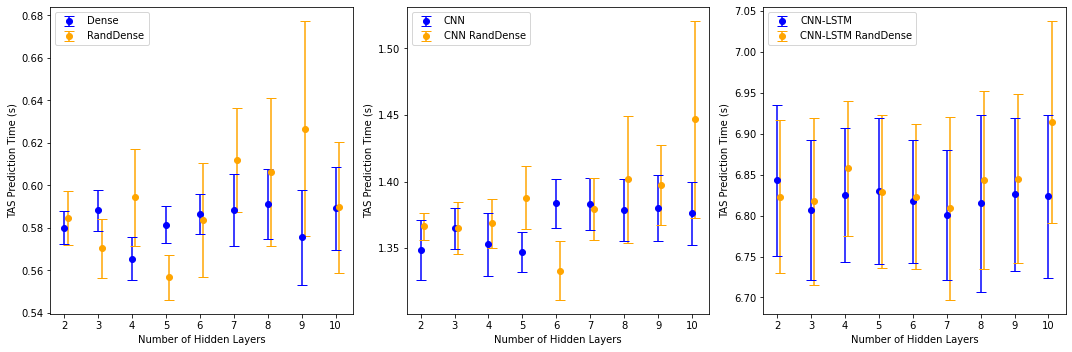

In [ ]:
# Plot TAS prediction speeds for all model architectures
fig, axes = plt.subplots(1, 3, figsize=(15,5))
standards = [dense_1M, cnn_1M, cnn_lstm_1M]
rand_denses = [rand_dense_1M, cnn_rand_dense_1M, cnn_lstm_rand_dense_1M]
standard_legend_labels = ['Dense', 'CNN', 'CNN-LSTM']
rand_legend_labels = ['RandDense', 'CNN RandDense', 'CNN-LSTM RandDense']
var_idx = 0

for i in range(3):

  standard_means = []
  standard_cis = []
  rand_means = []
  rand_cis = []

  for layer_idx in range(9):

    standard_times = standards[i][layer_idx, var_idx]
    standard_means.append(np.mean(standard_times))
    ci = stats.t.interval(alpha=0.95, df=len(standard_times)-1, loc=np.mean(standard_times), scale=stats.sem(standard_times))
    standard_cis.append((ci[1]-ci[0])/2)

    rand_times = rand_denses[i][layer_idx, var_idx]
    rand_means.append(np.mean(rand_times))
    ci = stats.t.interval(alpha=0.95, df=len(rand_times)-1, loc=np.mean(rand_times), scale=stats.sem(rand_times))
    rand_cis.append((ci[1]-ci[0])/2)

  ax = axes[i]
  ax.errorbar(x=np.arange(2,11,1), y=standard_means, yerr=standard_cis, label=standard_legend_labels[i], color='blue', marker='o', capsize=5, ls='none')
  ax.errorbar(x=np.arange(2.1,11.1,1), y=rand_means, yerr=rand_cis, label=rand_legend_labels[i], color='orange', marker='o', capsize=5, ls='none')
  ax.set_xlabel('Number of Hidden Layers')
  ax.set_ylabel('TAS Prediction Time (s)')
  ax.legend()

fig.tight_layout()
fig.savefig(img_path+'tas_prediction_speeds.pdf')

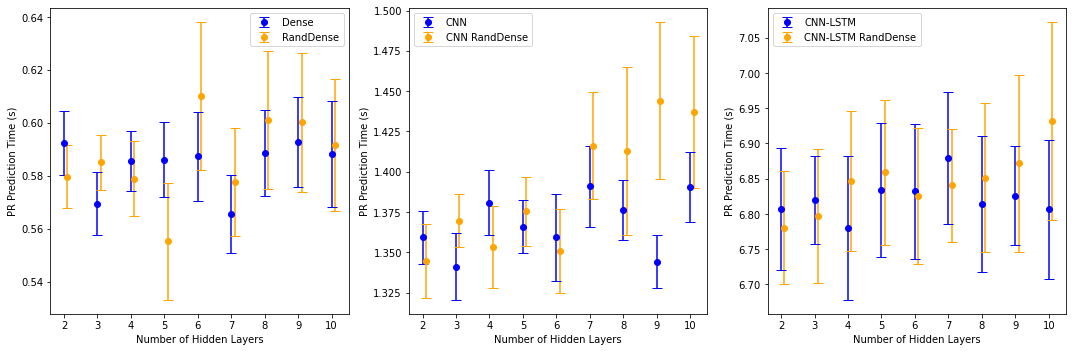

In [ ]:
# Plot PR prediction speeds for all model architectures
fig, axes = plt.subplots(1, 3, figsize=(15,5))
standards = [dense_1M, cnn_1M, cnn_lstm_1M]
rand_denses = [rand_dense_1M, cnn_rand_dense_1M, cnn_lstm_rand_dense_1M]
standard_legend_labels = ['Dense', 'CNN', 'CNN-LSTM']
rand_legend_labels = ['RandDense', 'CNN RandDense', 'CNN-LSTM RandDense']
var_idx = 2

for i in range(3):

  standard_means = []
  standard_cis = []
  rand_means = []
  rand_cis = []

  for layer_idx in range(9):

    standard_times = standards[i][layer_idx, var_idx]
    standard_means.append(np.mean(standard_times))
    ci = stats.t.interval(alpha=0.95, df=len(standard_times)-1, loc=np.mean(standard_times), scale=stats.sem(standard_times))
    standard_cis.append((ci[1]-ci[0])/2)

    rand_times = rand_denses[i][layer_idx, var_idx]
    rand_means.append(np.mean(rand_times))
    ci = stats.t.interval(alpha=0.95, df=len(rand_times)-1, loc=np.mean(rand_times), scale=stats.sem(rand_times))
    rand_cis.append((ci[1]-ci[0])/2)

  ax = axes[i]
  ax.errorbar(x=np.arange(2,11,1), y=standard_means, yerr=standard_cis, label=standard_legend_labels[i], color='blue', marker='o', capsize=5, ls='none')
  ax.errorbar(x=np.arange(2.1,11.1,1), y=rand_means, yerr=rand_cis, label=rand_legend_labels[i], color='orange', marker='o', capsize=5, ls='none')
  ax.set_xlabel('Number of Hidden Layers')
  ax.set_ylabel('PR Prediction Time (s)')
  ax.legend()

fig.tight_layout()
fig.savefig(img_path+'pr_prediction_speeds.pdf')